<a href="https://colab.research.google.com/github/gcarmonav/Actividad-7/blob/main/El_vendedor_viajero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 7 - El problema del vendedor viajero

##Decisiones bajo incertidumbre

Por: Giovanna Andrea Carmona Valencia - Hilber García López


1. Planteamiento del problema

Un vendedor debe hacer un recorrido por las siguientes ciudades de Colombia en su carro (no necesariamente en este orden):

- Palmira
- Pasto
- Tuluá
- Bogota
- Pereira
- Armenia
- Caldas
- Valledupar
- Montería
- Soledad
- Cartagena
- Barranquilla
- Medellín
- Bucaramanga
- Cúcuta

Se desea obtener el orden óptimo, teniendo en cuenta el costo de desplazamiento entre ciudades, el cual se encuentra compuesto por el valor de la hora del vendedor, el costo de los peajes y el costo del combustible.


###1.1. Supuestos

####1.1.1. Valor de la hora del vendedor:

Para este ejercicio se planteará un vendedor con un salario fijo equivalente a dos (2) salarios mensuales mínimos equivalentes a 1.817.052 más un salario variable promedio de $3.000.000 por concepto de comisiones, a estos valores se les agregaran los costos laborales a cargo del empleador como los aportes a seguridad social y parafiscales y los gastos por las prestaciones sociales, cuyos porcentajes y valores se enuncian a continuación:

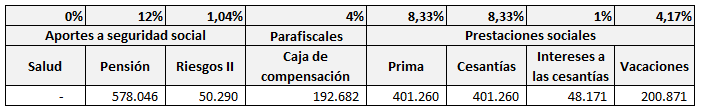

Los anteriores costos nos generan el gasto laboral total del vendedor:


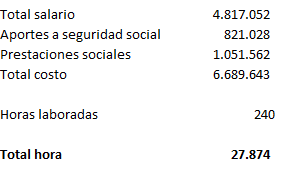

Tomamos el costo total del empleado y lo dividimos por las horas mensuales laboradas en Colombia (240 horas/mes) y nos da un costo de $ 27.874 por hora, el cual será tomado en los algoritmos de optimización.

####1.1.2. Vehículo utilizado:

Dado que para este tipo de trabajos es necesario un carro que no consuma mucho combustible y que sea de gama media, se utilizará un vehículo Chevrolet Spark GT con un cilindraje de 1.200 y 80 HP que tiene un rendimiento promedio de 67 km/galón (tomado de https://www.autofact.com.co/blog/comprar-carro/mercado/carros-menor-consumo)

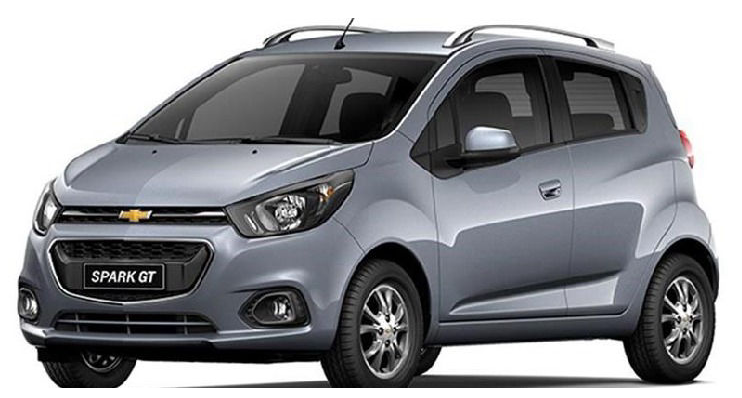

####1.1.3. Costo de gasolina y velocidad promedio:

Para el cálculo del costo de combustible se tomó como referencia un costo de $ 8.525 por galón (tomado de https://es.globalpetrolprices.com/Colombia/gasoline_prices/)

Asimismo, para efectos de cálcular la duración de los viajes de acuerdo a las distancias entre las ciudades se trabajó con una velocidad promedio de 70km/hora.

####1.1.4. Peajes y distancias:

Las distancias entre ciudades fueron tomadas de la aplicación google.maps mientras que los costos de peajes fueron consultados en la web (en páginas como: www.viajaporcolombia.com/, www.motor.com.co y https://peajescolombia.com)

##2. Desarrollo 

Se importan las librerías que se van a utilizar

In [ ]:
import numpy as np, random
import matplotlib.pyplot as plt

## 2.1. Algoritmo Genético

Los algoritmos genéticos fueron creados y presentados en los años 70's y 80's por John Holland y David Goldberg como un método de optimización de búsqueda global.

Este tipo de métodos explora todo el espacio de soluciones del problema permitiendo salir de posibles óptimos locales e ir en busca de óptimos globales, es decir las soluciones que se ajustan mejor a las condiciones del mismo problema. 

A través de los algorítmos genéticos se hace evolucionar una población de individuos, o conjunto de soluciones posibles del problema, sometiéndola a acciones aleatorias semejantes a las que actúan en la evolución biológica tales como mutaciones y recombinaciones genéticas; así como también a una selección de acuerdo con algún criterio, en función del cual se decide cuáles son los individuos más adaptados, que sobreviven, y cuáles los menos aptos, que son descartados.


A continuación se utiliza un algoritmo genético para la solución del problema del vendedor viajero planteado en la parte inicial:

En primer lugar se crean la matriz de distancia entre las ciudades y el costo de peajes entre estas de acuerdo a la búsqueda realizada en la web y en la aplicación google.maps. Para mayor facilidad se enumeraron las ciudades, de la siguiente manera: 

0=Bogotá
1=Palmira
2=Medellín
3=Pasto
4=Tuluá
5=Pereira
6=Armenia
7=Caldas
8=Valledupar
9=Monteria
10=Soledad
11=Cartagena
12=Barranquilla
13=Bucaramanga
14=Cúcuta


In [ ]:
##Matriz de distancia entre las ciudades
m_ciudades=np.empty([15,15])
m_ciudades[0,:]=[0, 448, 415.6, 723, 369.7, 320, 280.9, 432, 864.6, 756.3, 995.7, 1038.6, 1001.5, 397.7, 555.8]
m_ciudades[1,:]=[448, 0, 407.7, 400.4, 78, 194.4, 164.9, 383.8, 1105.3, 806.8, 1095.8, 1033.4, 1242.1, 749.3, 942]
m_ciudades[2,:]=[415.6, 407.7, 0, 792.6, 325, 224, 268, 23.3, 748, 404, 696, 631, 706, 392, 584]
m_ciudades[3,:]=[723, 400.4, 792.6, 0, 469, 586, 556, 775, 1496, 1198, 1629, 1424, 1633, 1140, 133]
m_ciudades[4,:]=[369.7, 78, 325, 469, 0, 117, 87.8, 307, 1028, 730, 1022, 956, 1165, 672, 864]
m_ciudades[5,:]=[320, 194.4, 224, 586, 117, 0, 44.6, 191, 913, 614, 1045, 841, 1049, 557, 748]
m_ciudades[6,:]=[280.9, 164.9, 268, 556, 87.8, 44.6, 0, 236, 940, 659, 1073, 885, 1077, 584, 775]
m_ciudades[7,:]=[432, 383.8, 23.3, 775, 307, 191, 236, 0, 769, 425, 717, 651, 727, 413, 604]
m_ciudades[8,:]=[864.6, 1105.3, 748, 1496, 1028, 913, 940, 769, 0, 433, 298, 362, 301, 448, 539]
m_ciudades[9,:]=[756.3, 806.8, 404, 1198, 730, 614, 659, 425, 433, 0, 343, 246, 354, 613, 704]
m_ciudades[10,:]=[995.7, 1095.8, 696, 1629, 1022, 1045, 1073, 717, 298, 343, 0, 129, 12, 580, 670]
m_ciudades[11,:]=[1038.6, 1033.4, 631, 1424, 956, 841, 885, 651, 362, 246, 129, 0, 119, 622, 712]
m_ciudades[12,:]=[1001.5, 1242.1, 706, 1633, 1165, 1049, 584, 727, 301, 354, 12, 622, 0, 586, 676]
m_ciudades[13,:]=[397.7, 749.3, 392, 1140, 672, 557, 584, 413, 448, 613, 580, 622, 586, 0, 199]
m_ciudades[14,:]=[555.8, 942, 584, 133, 864, 748, 775, 604, 539, 704, 670, 712, 676, 199, 0 ]


In [ ]:
## Matriz de peajes entre ciudades
m_peajes=np.empty([15,15])
m_peajes[0,:]=[0, 99500, 68100, 128000, 99500, 66200, 51700, 40500, 96500, 80500, 132000, 122300, 134200, 41200, 39700]
m_peajes[1,:]=[99500, 0, 90000, 37500, 26300, 49600, 47900, 72700, 147000, 156500, 184700, 186000, 184700, 122000, 137100]
m_peajes[2,:]=[68100, 90000, 0, 118400, 90000, 40400, 54900, 28300, 83300, 79600, 105500, 96000, 105500, 58300, 73400]
m_peajes[3,:]=[128000, 37500, 118400, 0, 37500, 78000, 76300, 101100, 175400, 184900, 213100, 214400, 213100, 150400, 165500]
m_peajes[4,:]=[99500, 26300, 90000, 37500, 0, 49600, 47900, 72700, 147000, 156500, 184700, 186000, 184700, 122000, 137100]
m_peajes[5,:]=[66200, 49600, 40400, 78000, 49600, 0, 14500, 23100, 97400, 106900, 135100, 136400, 135100, 72400, 87500]
m_peajes[6,:]=[51700, 47900, 54900, 76300, 47900, 14500, 0, 37600, 94300, 121400, 132000, 150900, 132000, 69300, 84400]
m_peajes[7,:]=[40500, 72700, 28300, 101100, 72700, 23100, 37600, 0, 74300, 94800, 112000, 124300, 112000, 49300, 64400]
m_peajes[8,:]=[96500, 147000, 83300, 175400, 147000, 97400, 94300, 74300, 0, 45900, 47600, 35700, 47600, 47000, 28200]
m_peajes[9,:]=[80500, 156500, 79600, 184900, 156500, 106900, 121400, 94800, 45900, 0, 44100, 51700, 44100, 8300, 64200]
m_peajes[10,:]=[134200, 184700, 105500, 213100, 184700, 135100, 132000, 112000, 47600, 44100, 0, 34500, 6000, 84700, 65900]
m_peajes[11,:]=[122300, 186000, 96000, 214400, 186000, 136400, 150900, 124300, 35700, 51700, 34500, 0, 34500, 72800, 54000]
m_peajes[12,:]=[134200, 184700, 105500, 213100, 184700, 135100, 132000, 112000, 47600, 44100, 6000, 34500, 0, 84700, 65900]
m_peajes[13,:]=[41200, 122000, 58300, 150400, 122000, 72400, 69300, 49300, 47000, 8300, 84700, 72800, 84700, 0, 15100]
m_peajes[14,:]=[39700, 137100, 73400, 165500, 137100, 87500, 84400, 64400, 28200, 64200, 65900, 54000, 65900, 15100, 0 ]


A continuación se establecen los parámetros iniciales, para esto se debe tener en cuenta las siguientes definiciones:

- Gen: una ciudad (representada como coordenadas (x, y))

- Individuo: (también conocido como "cromosoma"): Es la única ruta que cumple las condiciones específicas

- Población: Es la colección de posibles rutas (es decir, una colección de individuos)

- Padres: dos rutas que se combinan para crear una nueva ruta
     
- Mutación: una forma de introducir variación en nuestra población intercambiando aleatoriamente dos ciudades en una ruta. Una tasa de mutación muy pequeña puede conducir a la deriva genética (que es de naturaleza no ergódica). Una tasa de recombinación que es demasiado alta puede conducir a la convergencia prematura del algoritmo genético. Una tasa de mutación demasiado alta puede conducir a la pérdida de buenas soluciones, a menos que se utilice una selección elitista. 

- Número de generaciones: número de iteraciones que se realizarán en el algoritmo.

In [ ]:
a_ciudades=np.array(list(range(0,15))) #Lista de las ciudades a trabajar
poblacion=30 #Número de individuos de nuestra población
num_padres=poblacion #Cantidad de padres
mutacion_r=0.1 #Tasa de mutación
num_gen=1000 #Número de generaciones
vh_v=27874 #Valor por hora del vendedor
v_c=8525 #Valor del galon de gasolina
pop=np.array([random.sample(list(a_ciudades), len(a_ciudades)) for _ in range(poblacion)])

El primer paso del algoritmo genético es la inicialización, en la cual se genera aleatoriamente una población inicial constituida por posibles soluciones del problema, que reciben el nombre de individuos. En la siguiente función se van a generar unas rutas y se crean las variables para que guarden las distancias  y el valor de los peajes de dichas rutas:

In [ ]:
def P_ruta (a_ciudades, m_ciudades,m_peajes): # A la función le ingresan las dos matrices de valores
    ##Se inicializan las variables
    ruta_f=list(range(0,16)) #Ruta final
    ruta=list(a_ciudades) #Se convierte la ruta actual a una lista (entra en forma de array)
    ruta_d=np.empty([1,15]) #Distancias de la ruta
    ruta_p=np.empty([1,15]) #Peajes de la ruta
    
    ##En este for se indexa los valores de distancia y peajes que hay entre ciudad y ciudad de la ruta
    ##Para ellos se utilizan dos variable "c y c_sig" que guardan la ciudad actual y la siguiente
    ## Para así poder colocar dichas posiciones en las matrices de distancias y peajes que hay desde una ciudad a la otra
    for j in range(0,(len(ruta)-1)):
        c=ruta[j]
        c_sig=ruta[j+1]
        ruta_d[0,j]=m_ciudades[c,c_sig]
        ruta_p[0,j]=m_peajes[c,c_sig]
    ##Este if se utiliza ya que en realidad son 16 ciudades incluyendo que el recorrido debe 
    ## terminar donde inició. Sin embargo en la primera iteración las rutas creadas no tienen
    ## esta posición '16' -->
    if len(ruta)>15:
        ruta_f=ruta

    else:
        ## --> Así que se agrega solo si la ruta de entrada tiene unicamente 15 ciudades
        ## De lo contrario la ruta final queda igual
        ruta_f[0:15]=ruta
        ruta_f[15]=ruta[0] ##Se indexan las primeras 15 posiciones con la ruta de ingreso
                           ## Y despues en la posición final se coloca la primera ciudad
        ruta_d[0,j+1]=m_ciudades[c_sig,ruta[0]]
        ruta_p[0,j+1]=m_peajes[c_sig,ruta[0]] ##Se busca tanto la distancia como el valor de peajes
                                              ## que hay entre la última ciudad y la primera
    return ruta_f,ruta_d,ruta_p


A continuación se realiza el cálculo del costo de cada ruta:

In [ ]:
def Rutas (m_ciudades, poblacion,a_ciudades,m_peajes,vh_v,v_c):
    ##Se inicializan las variables con sus respectivos tamaños
    pop_rutasd=np.empty([poblacion,15]) #Matriz que muestra la distancia de cada indviduo (ruta)
    pop_rutas=np.empty([poblacion,16],int) #Matriz de la población con las 16 ciudades
    pop_rutasp=np.empty([poblacion,15]) #Matriz que muestra el valor de los peajes de cada indviduo (ruta)
    mtriz_coste=np.empty([poblacion,3]) #Matriz que almacena los tres parametros que conforman el coste
                                        # costo peajes + costo horas + costo combustible
    ##Se utiliza un for para realizar el proceso de cálculo del coste de cada ruta
    for i in range(poblacion):
        #Se utiliza la función P_ruta
        pop_rutas[i,:],pop_rutasd[i,:],pop_rutasp[i,:]=P_ruta(a_ciudades[i,:],m_ciudades,m_peajes)
        d=pop_rutasd[i,:]
        p=pop_rutasp[i,:]
        mtriz_coste[i,0]=(sum(d)/67)*v_c #Se realiza el cálculo de la distancia final de la ruta
                        ## y se haya el valor del combustible necesario para recorrer dicha distancia
                        
        mtriz_coste[i,1]=sum(p) #Se realiza el cálculo del costo total en peajes de la ruta
        
        mtriz_coste[i,2]=(sum(d)/70)*vh_v #Se realiza el cálculo de la distancia final de la ruta
                        ## y se haya el valor de las horas necesarias para recorrer dicha distancia y así el valor total de hora del vendedor
    return pop_rutas, mtriz_coste

Dado que el algoritmo genético se basa en el biología evolutiva, en la cual se garantiza la "supervivencia del más apto", se hace uso de la función Fitness mediante la cual se clasifica a cada individuo en la población. Esta función arroja una lista ordenada de la población de mayor a menor desempeño de acuerdo a la función de costo

In [ ]:
def Funcion_padres(ruta_p,mtriz_coste, num_padres):
    ## Seinicializan las variables
    padres_f = np.empty((num_padres,ruta_p.shape[1]),int) #matriz de población final
    fitness=np.empty([mtriz_coste.shape[0],1]) #matriz del coste total de cada ruta
    for i in range(mtriz_coste.shape[0]):
        fitness[i]=sum(mtriz_coste[i,:]) #Se calcula el coste total de cada ruta
    best_fitness=sorted(fitness) #Se ordena de mayor a menor desempeño
    for i in range(num_padres):
        x=np.where(fitness==best_fitness[i])
        padres_f[i,:]=ruta_p[x[0],:] #Se organiza la población de mayor a menosr desempeño
    return padres_f,best_fitness


En la siguiente etapa encontramos la reproducción utilizando el grupo de apareamiento creado en la función padres, con el fin de que se incluyan todas las ciudades en la siguiente generación, se utiliza la técnica de cruce ordenado en cual se selecciona una cadena al azar compuesta por 3 ciudades en el primer padre que se mantendrán fijas como punto de cruce para unir las dos cadenas y producir descendencia.

La función crossover se encarga de cruzar los padres tomando 3 valores fijos del primer padre y colocando dichos valores en la misma posición que se encuentren pero en el padre 2

In [ ]:
def crossover (padres,poblacion):
    ## Se inicializan las variables
    padres=padres[:,0:15] #con el fin de evitar errores se suprime el recorrido de la última ciudad a la primera
    des=np.array([random.sample(list(a_ciudades), len(a_ciudades)) for _ in range(poblacion)])
    des_f=np.array([random.sample(list(range(0,17)), 16) for _ in range(poblacion)])
    ubs=np.empty([1,4],int)
    for i in range(poblacion-1):
        p1=random.sample(list(padres[i,:]), 3) #Se escogen los valores del primer padre a utilizar
        p2=list(padres[i+1,:]) #Se escoge el segundo padre
        for j in range(len(p1)):
            #Se indexa en las posiciones del primer padre sus valores en el segundo padre 
            ub=np.where(int(p1[j])==padres[i,:])
            ubs[0,j]=ub[0]
            t=p2.index(p1[j])
            p2[t],p2[int(ubs[0,j])]=p2[int(ubs[0,j])],p2[t]
        des[i,:]=p2
    des_f[:,0:15]=des
    des_f[:,15]=des[:,0]# Ya hecho el cruce se vuelve a color el recorrida de la última ciudad a la primera
                    ## para que se tenga en cuenta al momento de calcular el coste de la ruta
    return des_f


El siguiente paso es la mutación, que ayuda a evitar la convergencia local al introducir rutas novedosas que permitirán explorar otras partes del espacio de la solución. 

Con el fin de no descartar ciudades se utilizará la mutación de intercambio.

La función de mutación se encarga de cambiar una ciudad de posición de forma aleatoria, teniendo en cuenta el índice de mutación que permitirá decidir cual será la ciudad cambiada.

In [ ]:
def mutacion(des, mutacion_r):
    des_f=np.array([random.sample(list(range(0,17)), 16) for _ in range(poblacion)])
    #Para esta mutación también se quital el recorrido de la última ciudad a la primera, ya que ésta también puede cambiar y generaría un error
    des=des[:,0:15]
    for i in range(des.shape[0]):
        for swapped in range(des.shape[1]):
            if(random.random() < mutacion_r): ## Este if es el que se encarga de que se cambie la ciudad
                                            ## solo si el número generado aleatoriamente es menor al
                                            ## índice de mutación
                swapWith = int(random.random() * des.shape[1])
                city1 = des[swapped,swapped]
                city2 = des[swapped,swapWith]
                des[swapped,swapped] = city2
                des[swapped,swapWith] = city1 ## Se cambia la posición de la ciudad elegida
    des_f[:,0:15]=des
    des_f[:,15]=des[:,0] ## Se vuelve a colocar la distancia entre la última ciudad a la primera
    return des

Se repite el procedimiento creando una nueva generación, para lo cual se clasifican las rutas de la generación determinando los padres potenciales, seleccionando una nueva generación  y aplicando nuevamente la mutación.

In [ ]:
for generacion in range(num_gen): ## Se utiliza el for para realizar el proceso de cración de las generaciones
    ruta_p,ruta_d=Rutas(m_ciudades,poblacion,pop,m_peajes,vh_v,v_c) #Se calcula primero el coste de la población inicial
    padres,fitness=Funcion_padres(ruta_p,ruta_d, num_padres) #Después se organiza de mayor a menor desempeño
    cr=crossover (padres,poblacion) #Se realiza el cruce
    pop=mutacion(cr, mutacion_r) #Se realiza la mutación de la población

Después de la creación de las 100 generaciones, se vuelve a calcular el costo y se organiza de acuerdo al mejor desempeño en función al menor costo y se imprime la mejor ruta encontrada

In [ ]:
ruta_p,ruta_d=Rutas(m_ciudades,poblacion,pop,m_peajes,vh_v,v_c)
poblacion_f,fitness=Funcion_padres(ruta_p,ruta_d, num_padres)
print("Mejor Ruta: ", poblacion_f[0, :])
print("Valor de Coste (COP) menor: ", fitness[0])

Mejor Ruta:  [13 14  5  6  9 12 10  2  8  0  7  1  3  4 11 13]
Valor de Coste (COP) menor:  [5008139.83522388]


Por último se grafica el cambio del valor del costo respecto a las iteraciones

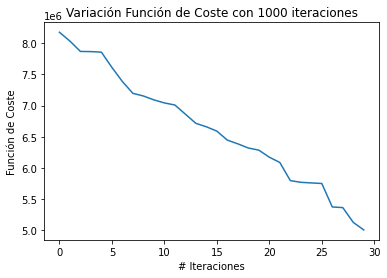

In [ ]:
plt.plot(sorted(fitness, reverse=True))
plt.xlabel("# Iteraciones")
plt.ylabel("Función de Coste")
plt.title('Variación Función de Coste con {} iteraciones'.format(num_gen))
plt.show()

##2.2. Colonia de hormigas

El algoritmo de colonia se basa en el comportamiento de las hormigas cuando salen del hormiguero a buscar comida. Estas depositan feromonas por aquellos lugares por donde pasan, de tal forma que cada hormiga cuando sale del  hormiguero en busca de alimento, tiene mayor probabilidad de escoger caminos por los que hayan ido más hormigas anteriormente, es decir, caminos con mayor cantidad de feromonas.





En este algoritmo se comienza con la construcción de caminos, en la cual para cada hormiga, el vector de memoria de ruta registra todos los números de ciudad por los que esta ha pasado en el orden de acceso. Suponiendo que la ciudad donde se encuentra actualmente la hormiga es i, la probabilidad de elegir la ciudad j como el siguiente objeto de visita es:



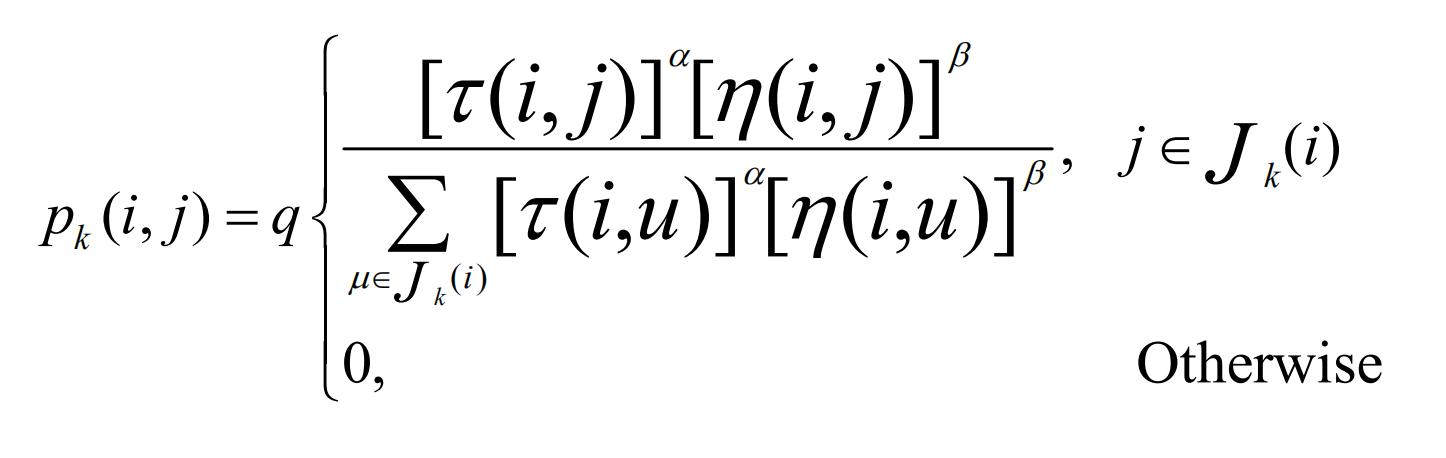

Después de cada iteración, la feromona en todos los caminos en el espacio del problema se evaporará. Multiplicamos todas las feromonas en los bordes con una constante menor que 1 (tasa de evaporación de feromonas). Luego, todas las hormigas liberan feromonas en el lado por el que pasan en esta ronda de acuerdo con la longitud del camino que construyeron.

Al igual que en el algoritmo genético, en la siguiente función se generan unas rutas y se crean las variables para que guarden las distancias y el valor de los peajes de dichas rutas:

In [ ]:
def P_ruta (a_ciudades, m_ciudades,m_peajes): # A la función le ingresan las dos matrices de valores
    ##Se inicializan las variables
    ruta=list(range(15))
    ## Se agrega la última distancia, es decir, de la última ciudad a la primera
    ruta[0:14]=a_ciudades
    ruta[15]=ruta[0]
    ruta_d=list(range(16))
    ruta_p=list(range(16))
    
    ##En este for se indexa los valores de distancia y peajes que hay entre ciudad y ciudad de la ruta
    ##Para ellos se utilizan dos variable "c y c_sig" que guardan la ciudad actual y la siguiente
    ## Para así poder colocar dichas posiciones en las matrices de distancias y peajes que hay desde una ciudad a la otra
    for j in range(0,15):
        c=ruta[j]
        c_sig=ruta[j+1]
        ruta_d[j]=m_ciudades[c,c_sig]
        ruta_p[j]=m_peajes[c,c_sig]
    
    ruta_d[j+1]=m_ciudades[c_sig,ruta[0]]
    ruta_p[j+1]=m_peajes[c_sig,ruta[0]]##Se busca tanto la distancia como el valor de peajes
                                           ## que hay entre la última ciudad y la primera
    return ruta,ruta_d,ruta_p

A continuación se realiza el cálculo del costo de cada ruta:

In [ ]:
def Rutas (m_ciudades, poblacion,m_peajes,vh_v,v_c):
    ##Se inicializan las variables con sus respectivos tamaños
    pop_rutasd=np.empty([len(poblacion),16]) #Matriz que muestra la distancia de cada indviduo (ruta)
    pop_rutas=np.empty([len(poblacion),16],int) #Matriz de la población con las 16 ciudades
    pop_rutasp=np.empty([len(poblacion),16]) #Matriz que muestra el valor de los peajes de cada indviduo (ruta)
    mtriz_coste=np.empty([len(poblacion),3]) #Matriz que almacena los tres parametros que conforman el coste
                                        # costo peajes + costo horas + costo combustible
                                        
    ##Se utiliza un for para realizar el proceso de cálculo del coste de cada ruta
    for i in range(len(poblacion)):
        #Se utiliza la función P_ruta y se realiza el mismo proceso que en e algoritmo genético
        pop_rutas[i,:],pop_rutasd[i,:],pop_rutasp[i,:]=P_ruta(poblacion[i,:],m_ciudades,m_peajes)
        d=pop_rutasd[i,:]
        p=pop_rutasp[i,:]
        mtriz_coste[i,0]=(sum(d)/67)*v_c
        mtriz_coste[i,1]=sum(p)
        mtriz_coste[i,2]=(sum(d)/70)*vh_v
    return pop_rutas, mtriz_coste


En este algorítmo se deben considerar los siguientes parámetros:
- Número de hormigas
- Factor de importancia de las feromonas: representa la importancia o influencia de la traza de feromona, que al variar puede enfocar al algoritmo hacia la exploración o explotación. Si alpha>0, a mayor α de genera mayor explotación en la búsqueda, y si alpha=0 entonces no se toma en cuenta la feromona.
- Factor de importancia de los datos de la función heurística: determina la influencia de la visibilidad, e igualmente al variar puede cambiar de un enfoque de exploración a uno de explotación. Si beta=0 todas las hormigas tiendan a construir la misma solución (explotación) dando lugar a convergencias prematuras. Por otro lado, si alpha>beta se prioriza la información aprendida en el proceso de constructivismo.
- Tasa de evaporación de feromonas: ayuda a ir eliminando la aceptación por parte de las hormigas de tomar rutas largas, e incrementa la preferencia de tomar rutas más cortas.

In [ ]:
#SE ESTABLECEN LOS PARÁMETROS INICIALES
vh_v=27874
v_c=8525
num_h = 15                   # Número de hormigas
alpha = 1                     # Factor de importancia de las feromonas
beta = 3                      # Factor de importancia de los datos de la función heurística
f_r = 0.3              # Tasa de evaporación de feromonas
num_c = 15                  # Cantidad de ciudades
feromonas = np.ones((num_c,num_c))   
m_c=(m_ciudades/67)*v_c
m_h=(m_ciudades//70)*vh_v
m_heu=m_c + m_h + m_peajes
#Se realizan los cálculos para la función heurística
heuristic = 1 / (np.eye(num_c) + m_heu) - np.eye(num_c)       # Matriz de información heurística, 1 / costo total
iter,itermax = 0,100     # Número de iteraciones a realizar

In [ ]:
while iter < itermax:
    r_hs = np.zeros((num_h, num_c)).astype(int) - 1   # Se crea la matriz que contendra el camino de cada hormiga
    firstCity = [i for i in range(15)] 
    random.shuffle(firstCity)  # Se asigna aleatoriamente una ciudad de inicio para cada hormiga
    unvisted = []
    p = []
    pAccum = 0
    
    ##Este primer for se encarga de asignar la primera ciudad a la que irá cada hormiga
    for i in range(len(r_hs)):
        r_hs[i][0] = firstCity[i]
    ## Se actualiza gradualmente la próxima ciudad que cada hormiga debe visitar -->
    for i in range(len(r_hs[0]) - 1):       
        for j in range(len(r_hs)):
            for k in range(num_c):
            ##--> Para ésto, se debe tener en cuenta que la siuiente ciudad no haya sido 
            ## visitada anteriormente
                if k not in r_hs[j]:
                    unvisted.append(k)
            ##Posteriormente se calcula la probabilidad que hay de ir a esa siguiente ciudad
            for m in unvisted:
                pAccum += feromonas[r_hs[j][i]][m] ** alpha * heuristic[r_hs[j][i]][m] ** beta
            for n in unvisted:
                p.append(feromonas[r_hs[j][i]][n] ** alpha * heuristic[r_hs[j][i]][n] ** beta / pAccum)
            
            ##Después se crea una ruleta que ayudará a elegir la siguiente ciudad a visitar
            ruleta = np.array(p).cumsum()               
            r = random.uniform(min(ruleta), max(ruleta))
            for x in range(len(ruleta)):
                if ruleta[x] >= r:                      
                    r_hs[j][i + 1] = unvisted[x]
                    break
            unvisted = []
            p = []
            pAccum = 0
    ## Se realiza la actualización de las feromonas volátiles
    feromonas = (1 - f_r) * feromonas            
    ## Se calcula el costo de la ruta creada
    pop_rutas,fitness = Rutas (m_ciudades, r_hs,m_peajes,vh_v,v_c)
    fitness=list(np.sum(fitness,axis=1))
    
    ##Para posteriormente, con base en el costo se realiza la actualización de las feromonas
    ## Que se define como la división entre la intensidad de la feromona y el costo de la ruta
    for i in range(len(r_hs)):
        for j in range(len(r_hs[i]) - 1):
            feromonas[r_hs[i][j]][r_hs[i][j + 1]] += 1 / fitness[i]     
        feromonas[r_hs[i][-1]][r_hs[i][0]] += 1 / fitness[i]
    iter += 1

In [ ]:
print("Mejor ruta encontrada:")
print(pop_rutas[fitness.index(min(fitness))])
print("Valor de Coste (COP) menor:")
print(min(fitness))

Mejor ruta encontrada:
[ 7  2  9 11 12 10  8 13 14  3  1  4  6  5  0  7]
Valor de Coste (COP) menor:
2413301.4692537314


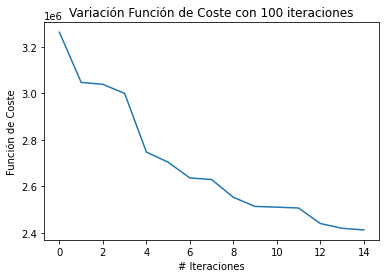

In [ ]:
plt.plot(sorted(fitness, reverse=True))
plt.xlabel("# Iteraciones")
plt.ylabel("Función de Coste")
plt.title('Variación Función de Coste con {} iteraciones'.format(itermax))
plt.show()

##3. Resultados

De acuerdo a los resultados del Algoritmo genético y Colonia de hormigas, se observa que con el primero se obtuvo una función de costo de $ 5.008.140 con un recorrido que contempla las ciudades en el siguiente orden: Bucaramanga - Cúcuta - Pereira - Armenia - Monteria - Barranquilla - Soledad - Medellín - Valledupar - Bogotá - Caldas - Palmira - Pasto - Tuluá - Cartagena - Bucaramanga

Mientras que con el algoritmo de colonia de hormigas se obtiene un costo total de $ 2.413.301 con un recorrido en el siguiente orden: Caldas - Medellín - Montería - Cartagena - Barranquilla - Soledad - Valledupar - Bucaramanga - Cúcuta - Pasto - Palmira - Tuluá - Armenía - Pereira - Bogotá - Caldas.

Con base en los costos, se puede decir que el mejor rendimiento se obtiene con la utilización del algoritmo de colonia de hormigas, el cual fue obtenido con los siguientes parámetros:

- Número de hormigas: 15
- Factor de importancia de las feromonas: 1
- Factor de importancia de los datos de la función heurística: 3
- Tasa de evaporación de las feromonas: 0.3 

En la colonia de hormigas los rastros de feromona corresponden a la probabilidad o deseabilidad de visitar una ciudad x después de visitar una ciudad y. De esta forma, se obtiene una función que representa la distancia recorrida y que se puede optimizar mediante un conjunto de permutaciones.

Dado que el método de colonia de hormigas cuenta con una memoría que almacena información de los caminos recorridos, la cual puede ser utilizada para construir soluciones válidas, evaluar la solución generada y reconstruir el camino que han seguido las hormigas, por lo tanto, este obtiene una mejor solución con el menor costo en comparación al algoritmo genético.

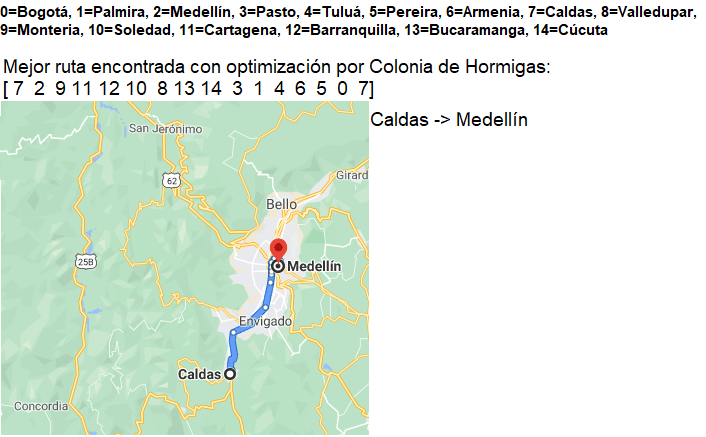

En el repositorio https://github.com/gcarmonav/Actividad-7_Parte2 se encuentran los códigos utilizados en esta entrada.

##4. Referencias

https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35

http://www.jcreview.com/fulltext/197-1578037726.pdf?1578371869

https://towardsdatascience.com/using-ant-colony-and-genetic-evolution-to-optimize-ride-sharing-trip-duration-56194215923f

Robles Algarín, C. A. (2010). Optimización por colonia de hormigas: aplicaciones y tendencias. Ingenieria Solidaria Volumen 6, 83-89.

Conogasi. (2018). Algoritmos genéticos. 2021, Julio 27, Conogasi.org Sitio web: http://conogasi.org/articulos/algoritmos-geneticos/